## Prediction of Heart Disease using categorical and binary models 

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

Using TensorFlow backend.
/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas: 0.24.2
Numpy: 1.16.2
Sklearn: 0.20.3
Matplotlib: 3.0.3
Keras: 2.2.4


In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [4]:
# Importing the dataset from UCI ML repository
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [5]:
# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# read the csv
cleveland = pd.read_csv(url, names=names)
cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# print the shape of the DataFrame, so we can see how many examples we have
print('Shape of DataFrame: {}'.format(cleveland.shape))
print(cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          67
sex           1
cp            4
trestbps    160
chol        286
fbs           0
restecg       2
thalach     108
exang         1
oldpeak     1.5
slope         2
ca          3.0
thal        3.0
class         2
Name: 1, dtype: object


In [7]:
# Print the last data points
# Description of the variable names can be found here 
# http://archive.ics.uci.edu/ml/datasets/Heart+Disease
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [8]:
# Need to clean up the data, removing missing data indicated with [?] 
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [9]:
# Drop all rows that have NaN values from df
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [10]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [11]:
# Transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [12]:
# Print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


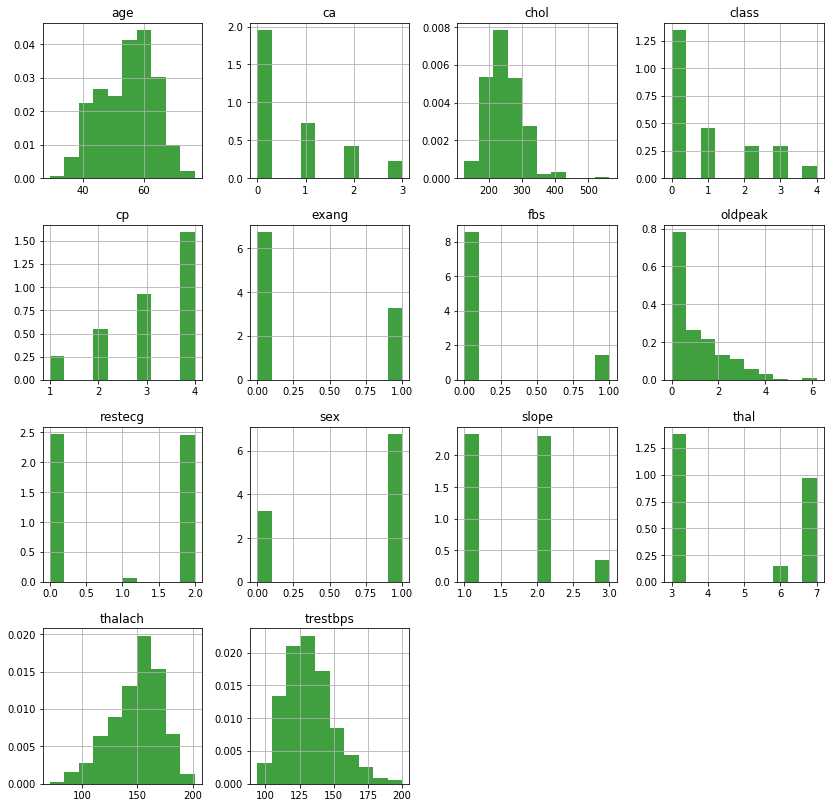

In [13]:
# Plot histograms for each variable
data.hist(figsize = (14, 14), density=True, facecolor='g', alpha=0.75)
plt.show()


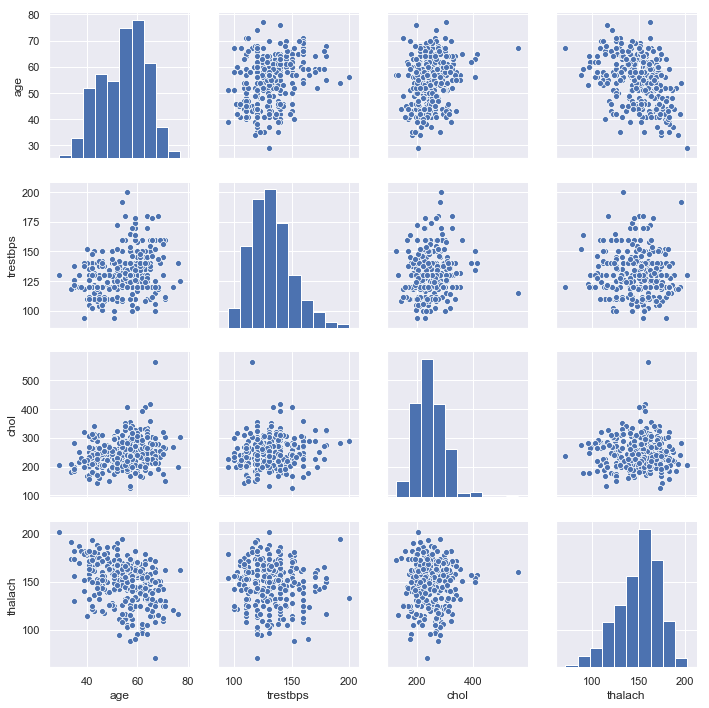

In [14]:
import seaborn as sns
sns.set()
col=['age','trestbps','chol','thalach']
sns.pairplot(data[col])
plt.show()

([<matplotlib.patches.Wedge at 0xd2d1fbb00>,
 [Text(-0.8326764778203732, -0.8640890482378871, 'Pain-Type 0'),
  Text(1.0990155248605884, 0.04652822923135265, 'Pain Type-1'),
  Text(0.14502072194059484, 1.0903985464993196, 'Pain-Type2'),
  Text(-0.6475047177600743, 0.889234300102311, 'Pain-Type3')],
 [Text(-0.4857279453952177, -0.5040519448054341, '47.8%'),
  Text(0.599463013560321, 0.02537903412619235, '27.9%'),
  Text(0.07910221196759719, 0.5947628435450834, '16.5%'),
  Text(-0.353184391505495, 0.4850368909648968, '7.7%')])

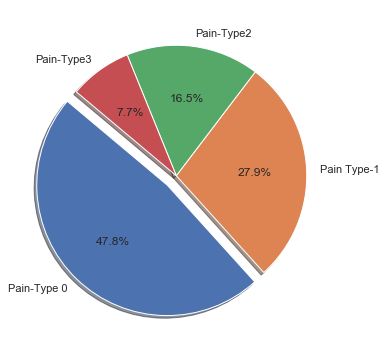

In [15]:
plt.figure(figsize=(10,6))
explode=[0.1,0,0,0]
labels='Pain-Type 0','Pain Type-1','Pain-Type2','Pain-Type3'
plt.pie(data['cp'].value_counts(),explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=140)

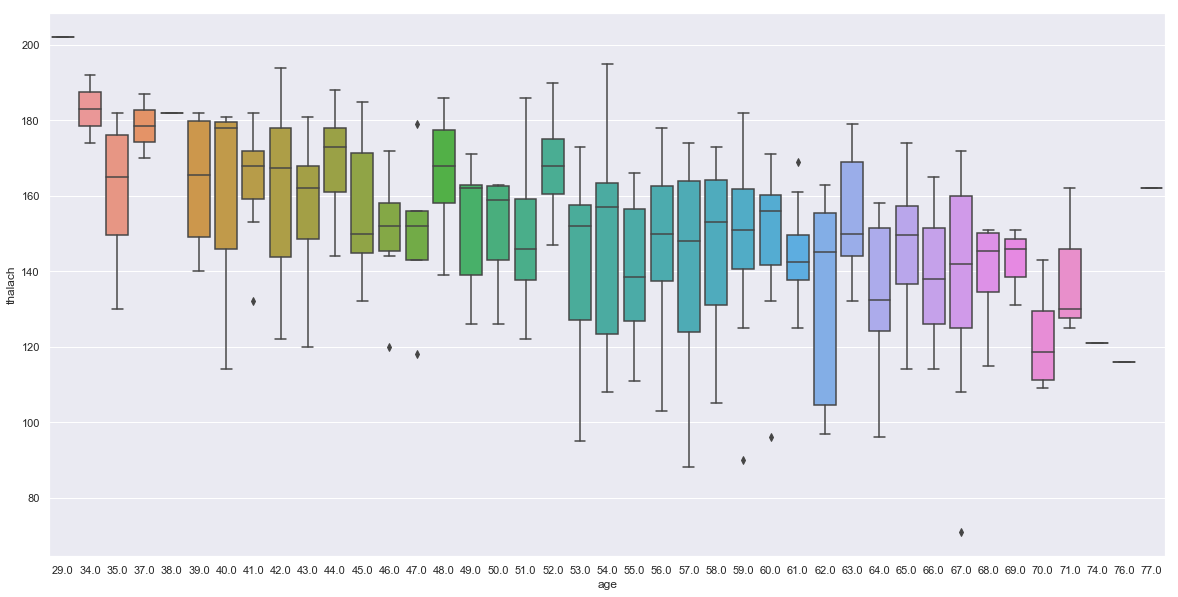

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(x='age',y='thalach',data=data)

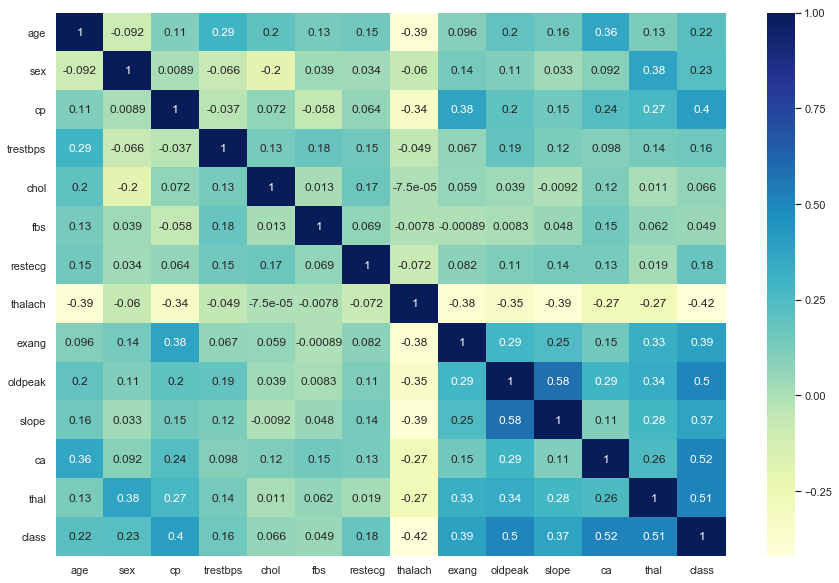

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

In [18]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['class'], 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [19]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print(Y_train.shape)
print(Y_train[:10])

(237, 5)
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# fit the model to the training data
history_cat = model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
237/237 [==============================] - 0s 896us/step - loss: 1.5410 - acc: 0.5105
Epoch 2/100
237/237 [==============================] - 0s 98us/step - loss: 1.4510 - acc: 0.5443
Epoch 3/100
237/237 [==============================] - 0s 108us/step - loss: 1.4200 - acc: 0.5443
Epoch 4/100
237/237 [==============================] - 0s 129us/step - loss: 1.3795 - acc: 0.5443
Epoch 5/100
237/237 [==============================] - 0s 112us/step - loss: 1.3537 - acc: 0.5443
Epoch 6/100
237/237 [==============================] - 0s 104us/step - loss: 1.3306 - acc: 0.5443
Epoch 7/100
237/237 [==============================] - 0s 117us/step - loss: 1.2951 - acc: 0.5443
Epoch 8/100
237/237 [==============================] - 0s 110us/step - loss: 1.2700 - acc: 0.5443
Epoch 9/100
237/237 [==============================] - 0s 108us/step - loss: 1.2475 - acc: 0.5443
Epoch 10/100
237/237 [==============================] - 0s 88us/step - 

237/237 [==============================] - 0s 103us/step - loss: 0.9207 - acc: 0.5949
Epoch 82/100
237/237 [==============================] - 0s 100us/step - loss: 0.9151 - acc: 0.5865
Epoch 83/100
237/237 [==============================] - 0s 97us/step - loss: 0.9195 - acc: 0.5949
Epoch 84/100
237/237 [==============================] - 0s 103us/step - loss: 0.9276 - acc: 0.6160
Epoch 85/100
237/237 [==============================] - 0s 100us/step - loss: 0.9117 - acc: 0.5949
Epoch 86/100
237/237 [==============================] - 0s 99us/step - loss: 0.9420 - acc: 0.6118
Epoch 87/100
237/237 [==============================] - 0s 93us/step - loss: 0.9132 - acc: 0.5823
Epoch 88/100
237/237 [==============================] - 0s 144us/step - loss: 0.9029 - acc: 0.6034
Epoch 89/100
237/237 [==============================] - 0s 95us/step - loss: 0.9295 - acc: 0.5949
Epoch 90/100
237/237 [==============================] - 0s 93us/step - loss: 0.9152 - acc: 0.5949
Epoch 91/100
237/237 [======

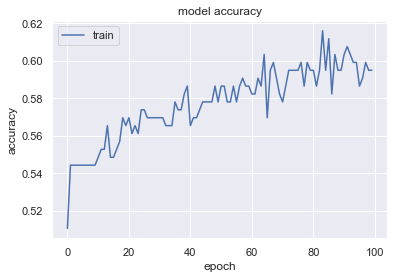

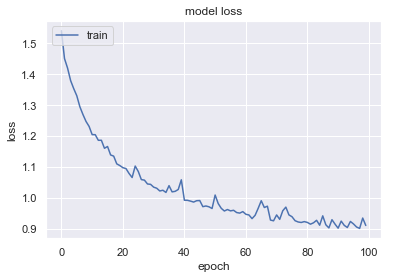

In [25]:
# summarize history for accuracy
plt.plot(history_cat.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_cat.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0]


In [27]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# fit the binary model on the training data
history_bin = binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
237/237 [==============================] - 0s 2ms/step - loss: 0.9821 - acc: 0.4557
Epoch 2/100
237/237 [==============================] - 0s 120us/step - loss: 0.7058 - acc: 0.4684
Epoch 3/100
237/237 [==============================] - 0s 133us/step - loss: 0.6834 - acc: 0.5527
Epoch 4/100
237/237 [==============================] - 0s 130us/step - loss: 0.6782 - acc: 0.5781
Epoch 5/100
237/237 [==============================] - 0s 130us/step - loss: 0.6761 - acc: 0.6245
Epoch 6/100
237/237 [==============================] - 0s 123us/step - loss: 0.6760 - acc: 0.6329
Epoch 7/100
237/237 [==============================] - 0s 128us/step - loss: 0.6704 - acc: 0.6287
Epoch 8/100
237/237 [==============================] - 0s 128us/step - loss: 0.6658 - acc: 0.6245
Epoch 9/100
237/237 [==============================] - 0s 110us/step - loss: 0.6709 - acc: 0.6667
Epoch 10/100
237/237 [==============================] - 0s 127us/step - loss: 0.6647 - acc: 0.6414
Epoch 11/100
237/237 

237/237 [==============================] - 0s 118us/step - loss: 0.4225 - acc: 0.8439
Epoch 84/100
237/237 [==============================] - 0s 123us/step - loss: 0.4169 - acc: 0.8481
Epoch 85/100
237/237 [==============================] - 0s 113us/step - loss: 0.4097 - acc: 0.8397
Epoch 86/100
237/237 [==============================] - 0s 110us/step - loss: 0.4173 - acc: 0.8270
Epoch 87/100
237/237 [==============================] - 0s 106us/step - loss: 0.4154 - acc: 0.8481
Epoch 88/100
237/237 [==============================] - 0s 102us/step - loss: 0.4170 - acc: 0.8228
Epoch 89/100
237/237 [==============================] - 0s 111us/step - loss: 0.4041 - acc: 0.8523
Epoch 90/100
237/237 [==============================] - 0s 126us/step - loss: 0.4206 - acc: 0.8523
Epoch 91/100
237/237 [==============================] - 0s 123us/step - loss: 0.4099 - acc: 0.8354
Epoch 92/100
237/237 [==============================] - 0s 103us/step - loss: 0.4041 - acc: 0.8523
Epoch 93/100
237/237 [=

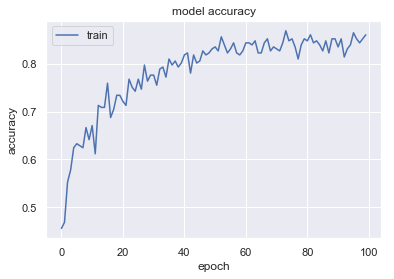

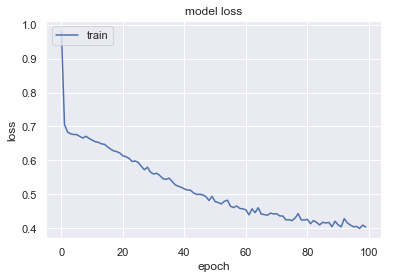

In [30]:
# summarize history for accuracy
plt.plot(history_bin.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_bin.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.5166666666666667
              precision    recall  f1-score   support

           0       0.72      0.94      0.82        31
           1       0.10      0.29      0.15         7
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         3

   micro avg       0.52      0.52      0.52        60
   macro avg       0.16      0.24      0.19        60
weighted avg       0.39      0.52      0.44        60



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))